Word2Vec
=====
영화 데이터 Word2Vec으로 학습시키기
-----
지난 시간에 다중분류에 영화 시놉시스 데이터를 활용해서 실습을 진행하였습니다.<br>
이번에는 영화 시놉시스를 Word2Vec으로 학습시키는 실습을 해보겠습니다.

In [54]:
# Word2Vec 모델 불러오기
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore")

In [55]:
import pandas as pd

In [56]:
# 데이터 불러오기
df = pd.read_csv('네이버 영화 시놉시스 데이터 (토큰화 완료).csv')

In [57]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [58]:
# Okt 불러오기
import konlpy.tag
okt = konlpy.tag.Okt()

In [59]:
# 토큰화 하기
# df['시놉시스_토큰'] = df['시놉시스'].map(lambda x : okt.morphs(x))

# 시간이 오래 걸려서 미리 해두었습니다.

In [60]:
# 토큰화된 결과 살펴보기
df['시놉시스_토큰']

0       ['“', '목격자', '가', '있어', '.', '자폐', '아야', '”', ...
1       ['의욕', '충만', '경찰대', '생', '기준', '(', '박서준', ')'...
2       ['싱어송라이터', '인', '‘', '그레타', '’(', '키이라', '나이틀리...
3       ['저승', '법', '에', '의하면', ',', '모든', '인간', '은', ...
4       ['뛰어난', '패션센스', '에', '매력', '적', '인', '성격', '이지...
5       ['모태솔로', '팀', '(', '돔놀', '글', '리슨', ')', '은', ...
6       ['진시황', '이후', '최고', '의', '패자', '로', '올라선', '항우...
7       ['해리', '포터', '(', '다니엘', '래드클리프', '분', ')', '는...
8       ['이름', '도', ',', '언어', '도', ',', '꿈', '도', ','...
9       ['여섯', '살', '아빠', ',', '다섯', '살', '딸', '…', '우...
10      ['17', '살', '내', '전부', '를', '흔들어', '버린', '그녀',...
11      ['접근', '금지', '허그', '금지', '키스', '금지', '이', '로맨스...
12      ['츠네오', '는', '심야', '의', '마작', '게임방', '에서', '아르...
13      ['세상', '을', '변화', '시킬', '거대한', '혁명', '의', '불꽃'...
14      ['해리', '포터', '에겐', '이번', '여름방학', '이', '별로', '즐...
15      ['지구', '의', '안보', '가', '위협', '당하는', '위기', '의',...
16      ['자신', '의', '인생', '을', '바꿔줄', '운명', '적', '인', ...
17      ['거대',

In [61]:
# 토큰화된 리스트로 만들기
import re
df['시놉시스_토큰'] = df['시놉시스_토큰'].map(lambda x : re.sub(r'[^\s\w]', '', str(x))).map(lambda x : x.split())

In [62]:
# Word2Vec 모델 학습시키기

model = Word2Vec(df["시놉시스_토큰"], window = 3, min_count = 3, size = 100)

In [63]:
# Word2Vec으로 원하는 단어와 유사한 단어 살펴보기
model.wv.similar_by_word("미국", topn = 50)

[('영국', 0.8934695720672607),
 ('일본', 0.8841047286987305),
 ('홍콩', 0.8792867660522461),
 ('한국', 0.8679085969924927),
 ('전역', 0.857778787612915),
 ('중국', 0.8552284240722656),
 ('지역', 0.8531506657600403),
 ('러시아', 0.8528435230255127),
 ('유럽', 0.8307453989982605),
 ('프랑스', 0.8305084109306335),
 ('독일', 0.8175445199012756),
 ('뉴욕', 0.8134578466415405),
 ('우주', 0.7998906373977661),
 ('서부', 0.7988344430923462),
 ('LA', 0.7865903377532959),
 ('대륙', 0.7830117344856262),
 ('클럽', 0.7807236909866333),
 ('당시', 0.7767125368118286),
 ('연방', 0.7700108289718628),
 ('스페인', 0.764275312423706),
 ('런던', 0.7607570290565491),
 ('소련', 0.759772002696991),
 ('누벨바그', 0.7558870911598206),
 ('연극', 0.7553863525390625),
 ('짙어지자', 0.7464140057563782),
 ('해군', 0.745901346206665),
 ('대한민국', 0.745296835899353),
 ('대전', 0.7435107827186584),
 ('챔피언', 0.7405194640159607),
 ('남부', 0.7389843463897705),
 ('극장', 0.7389485836029053),
 ('베트남', 0.7385576963424683),
 ('잠수함', 0.7373530864715576),
 ('외곽', 0.7365407347679138),
 ('지상',

In [64]:
# Word2Vec으로 원하는 단어와 유사한 단어 살펴보기
model.wv.similar_by_word("살인", topn = 50)

[('전말', 0.8359038233757019),
 ('용의자', 0.8210731148719788),
 ('현장', 0.7904789447784424),
 ('사건', 0.7836554050445557),
 ('범인', 0.7820598483085632),
 ('끔찍한', 0.7782727479934692),
 ('살해', 0.7658687829971313),
 ('연쇄살인', 0.7648016214370728),
 ('수사', 0.7641202211380005),
 ('원인', 0.7457908987998962),
 ('범', 0.7434436082839966),
 ('의문', 0.7304750680923462),
 ('도난', 0.7289626598358154),
 ('배후', 0.7264916896820068),
 ('지목', 0.7264107465744019),
 ('암살', 0.7253171801567078),
 ('조사', 0.7168893218040466),
 ('범죄', 0.7128133773803711),
 ('직접', 0.7125636339187622),
 ('방화', 0.7110036015510559),
 ('은폐', 0.7097386121749878),
 ('자백', 0.7070877552032471),
 ('누명', 0.7069419026374817),
 ('테러', 0.7061893343925476),
 ('발생', 0.7060331106185913),
 ('개입', 0.6998104453086853),
 ('조작', 0.6990053653717041),
 ('진상', 0.6975278258323669),
 ('해결', 0.696027934551239),
 ('저지른', 0.6952067613601685),
 ('몽타주', 0.6951383948326111),
 ('폭발', 0.6951296925544739),
 ('사고', 0.6906470656394958),
 ('연쇄', 0.6855626106262207),
 ('당하는', 0

In [65]:
# 모델에 쓰인 단어 확인하기
model.wv.vocab

{'목격자': <gensim.models.keyedvectors.Vocab at 0x271f1442b70>,
 '가': <gensim.models.keyedvectors.Vocab at 0x271da6d6278>,
 '있어': <gensim.models.keyedvectors.Vocab at 0x271da6d64a8>,
 '자폐': <gensim.models.keyedvectors.Vocab at 0x271da6d6c18>,
 '아야': <gensim.models.keyedvectors.Vocab at 0x271da6d6c50>,
 '신념': <gensim.models.keyedvectors.Vocab at 0x271e4bc6c88>,
 '은': <gensim.models.keyedvectors.Vocab at 0x271e4bc60b8>,
 '잠시': <gensim.models.keyedvectors.Vocab at 0x271fb5056d8>,
 '접어': <gensim.models.keyedvectors.Vocab at 0x271fb505710>,
 '두고': <gensim.models.keyedvectors.Vocab at 0x271fb505748>,
 '현실': <gensim.models.keyedvectors.Vocab at 0x271fb505780>,
 '을': <gensim.models.keyedvectors.Vocab at 0x271fb5057b8>,
 '위해': <gensim.models.keyedvectors.Vocab at 0x271fb5057f0>,
 '속물': <gensim.models.keyedvectors.Vocab at 0x271fb505828>,
 '이': <gensim.models.keyedvectors.Vocab at 0x271fb505860>,
 '되기로': <gensim.models.keyedvectors.Vocab at 0x271fb505898>,
 '마음먹은': <gensim.models.keyedvectors.Vocab

In [128]:
# 시각화를 위해 단어 리스트 저장

vocabs = list(model.wv.vocab.keys())[:300]
word_vectors_list = [model.wv[v] for v in vocabs]

In [129]:
# scatter plot으로 그리기 위해 PCA를 수행

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

In [130]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize = (8, 6))
    plt.scatter(xs, ys, marker = "o", alpha = 0.5)
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy = (xs[i], ys[i]))
        
%matplotlib inline

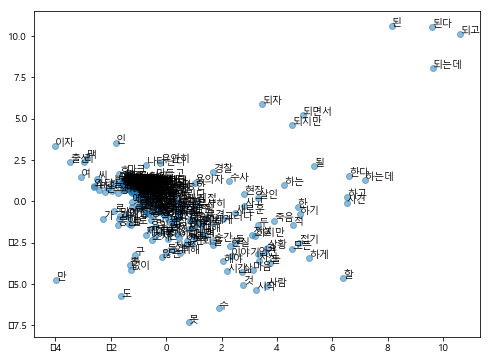

In [131]:
# 위에서 만들어준 함수를 사용해 scatter plot으로 시각화

plot_2d_graph(vocabs, xs, ys)

In [27]:
# FastText 설치 전에 pyemd 설치 하기
! pip install pyemd

You should consider upgrading via the 'c:\users\hong\anaconda3\python.exe -m pip install --upgrade pip' command.


In [28]:
from gensim.models.fasttext import FastText

In [165]:
# FastText 모델 학습시키기

# model_ft = FastText(df['시놉시스_토큰'], window = 3, min_count = 3, iter = 100)
# model_ft.save("FastText.model")

# 이 역시 학습이 오래 걸려서 미리 학습시킨 결과물을 불러오겠습니다.

In [166]:
# FastText 모델 불러오기
model_ft = Word2Vec.load('FastText.model')

In [167]:
# FastText로 원하는 단어와 유사한 단어 살펴보기
model_ft.wv.similar_by_word("폭발", topn = 50)

[('대폭발', 0.7213664054870605),
 ('충돌', 0.5639715790748596),
 ('핵폭발', 0.5555319786071777),
 ('폭발사고', 0.5440574288368225),
 ('추락', 0.5274173021316528),
 ('폭파', 0.4867469072341919),
 ('발생', 0.4852457046508789),
 ('추락사고', 0.4801293611526489),
 ('익사', 0.4609425663948059),
 ('발전', 0.4584811329841614),
 ('분출', 0.4560834765434265),
 ('돌진', 0.45399218797683716),
 ('파괴', 0.4505709111690521),
 ('봉쇄', 0.450230211019516),
 ('고려', 0.449831485748291),
 ('돌변', 0.4489589333534241),
 ('사고', 0.4452323913574219),
 ('사망', 0.44259196519851685),
 ('증가', 0.4257033169269562),
 ('대화재', 0.4212576746940613),
 ('출동', 0.4180981516838074),
 ('조사', 0.41702160239219666),
 ('기사화', 0.41454797983169556),
 ('전멸', 0.41316360235214233),
 ('기소', 0.4082012176513672),
 ('기체', 0.40710604190826416),
 ('거대한', 0.40608036518096924),
 ('전복', 0.4051949977874756),
 ('진입', 0.3994802236557007),
 ('침몰', 0.397513747215271),
 ('화재', 0.39667069911956787),
 ('해후', 0.39664942026138306),
 ('붕괴', 0.39514732360839844),
 ('살해', 0.3940669000148773)

In [169]:
# 문맥적 유사도가 의미적 유사도를 보장하지 않는 예시

model_ft.wv.similar_by_word("형사", topn = 50)

[('기자', 0.5342612862586975),
 ('변호사', 0.5298390984535217),
 ('검사', 0.5116862058639526),
 ('경찰', 0.5083744525909424),
 ('반장', 0.4891981780529022),
 ('남자배우', 0.4846939742565155),
 ('직원', 0.47725459933280945),
 ('검사관', 0.475793719291687),
 ('기상학자', 0.4739614725112915),
 ('요원', 0.4572219252586365),
 ('강태오', 0.4505419433116913),
 ('동기', 0.43861615657806396),
 ('경찰청', 0.43828094005584717),
 ('경찰관', 0.4381808042526245),
 ('사이버', 0.4354717433452606),
 ('경찰청장', 0.43504011631011963),
 ('학생', 0.4248988628387451),
 ('장학생', 0.4238593578338623),
 ('포두', 0.4215131402015686),
 ('이름난', 0.4180397391319275),
 ('운전사', 0.41724544763565063),
 ('남자', 0.41655802726745605),
 ('선수', 0.41335850954055786),
 ('운전', 0.41028398275375366),
 ('신학생', 0.4101557731628418),
 ('프리츠', 0.4057796597480774),
 ('조수', 0.3964126408100128),
 ('덕배', 0.39631950855255127),
 ('제자', 0.39402222633361816),
 ('아이린', 0.3936616778373718),
 ('미시마', 0.3930417001247406),
 ('의사', 0.39206063747406006),
 ('소설가', 0.39185723662376404),
 ('변호인', 0.3

In [170]:
# 모델에 단어가 포함되어 있는지 확인해보기
"살인범" in model_ft.wv.vocab

False

In [171]:
# FastText로 학습되지 않은 단어와 유사한 단어 찾아보기
model_ft.wv.similar_by_word("살인범", topn = 50)

[('연쇄살인범', 0.8142257332801819),
 ('범인', 0.4567645788192749),
 ('살인죄', 0.4460400938987732),
 ('살인', 0.43845808506011963),
 ('방화', 0.43485987186431885),
 ('심증', 0.43188080191612244),
 ('궁지', 0.4178260862827301),
 ('케슬러', 0.40887248516082764),
 ('에누리', 0.3990245461463928),
 ('권모술수', 0.3930375277996063),
 ('은행강도', 0.391129732131958),
 ('흔적', 0.3902514576911926),
 ('누명', 0.38698214292526245),
 ('배후', 0.38591039180755615),
 ('내부', 0.38423851132392883),
 ('수사', 0.383238822221756),
 ('혐의', 0.3826877474784851),
 ('오클랜드', 0.3793259263038635),
 ('정보사', 0.379102885723114),
 ('전화번호', 0.3784949481487274),
 ('메인랜드', 0.37349116802215576),
 ('강도', 0.3729104995727539),
 ('용의자', 0.3721276521682739),
 ('저격', 0.3714935779571533),
 ('체포', 0.37124761939048767),
 ('철선', 0.3705154061317444),
 ('단서', 0.37038594484329224),
 ('소년원', 0.36751875281333923),
 ('광룡', 0.3645886778831482),
 ('장발장', 0.36191534996032715),
 ('종국', 0.36153465509414673),
 ('경찰', 0.36097556352615356),
 ('힉스', 0.35907602310180664),
 ('빈틈', 0.3

WMD를 활용하여 문서 유사도 구하기
-----
WMD는 Word Mover's Distance의 줄임말입니다.<br>
Word2Vec으로 단어의 벡터를 구한 뒤 단어간의 위치 차이를 기반으로 유사도를 구하는 과정입니다.

In [172]:
# WMD 활용
import pyemd

model_ft.wv.wmdistance(df['시놉시스_토큰'][0], df['시놉시스_토큰'][1])

17.644978920926164

In [179]:
# WMD를 활용하여 문서 유사도 구하기
wmd = df['시놉시스_토큰'][:100].map(lambda x : model_ft.wv.wmdistance(df['시놉시스_토큰'][28], x))

In [180]:
# WMD 기반 유사한 문서 출력하기
idx = wmd.sort_values()[:10].index.tolist()
print(df['영화제목'][idx])

28                 해리 포터와 혼혈 왕자(6편)
26    해리 포터와 죽음의 성물 - 2부(7-2편, 자막판)
80    해리 포터와 죽음의 성물 - 2부(7-2편, 자막판)
50                     헝거게임 : 더 파이널
79                     브레이킹 던 part2
37                             아이언맨
27               해리 포터와 불사조 기사단(5편)
30                              인셉션
7                 해리 포터와 마법사의 돌(1편)
38                해리 포터와 마법사의 돌(1편)
Name: 영화제목, dtype: object
